1. Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset

Reference
https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

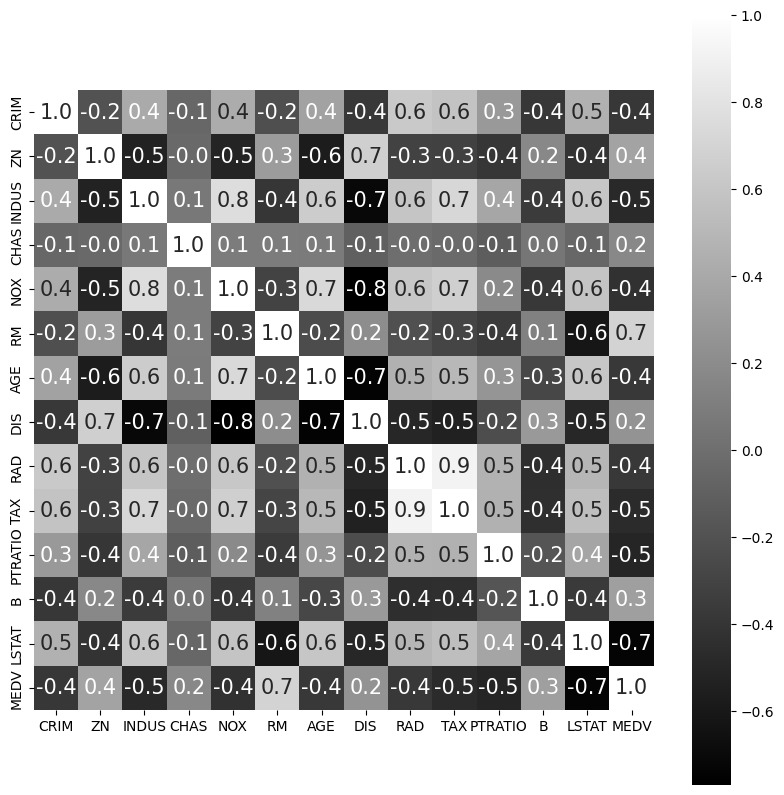

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [ ]:
X =data.drop(['MEDV'], axis = 1)# data['area']#
y = data['MEDV']

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim =13, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 2s 32ms/step - loss: 555.0668 - mse: 555.0668 - mae: 21.9265 - val_loss: 574.6067 - val_mse: 574.6067 - val_mae: 22.2509
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 536.5571 - mse: 536.5571 - mae: 21.4967 - val_loss: 549.2224 - val_mse: 549.2224 - val_mae: 21.6745
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 499.7039 - mse: 499.7039 - mae: 20.6040 - val_loss: 495.1686 - val_mse: 495.1686 - val_mae: 20.3810
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 421.1460 - mse: 421.1460 - mae: 18.5445 - val_loss: 378.4741 - val_mse: 378.4741 - val_mae: 17.2345
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 279.1259 - mse: 279.1259 - mae: 14.2828 - val_loss: 187.1823 - val_mse: 187.1823 - val_mae: 11.1189
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 151.8389 - mse: 151.8389 - mae: 9.5412 - val_loss: 100.4082 - val_mse: 10

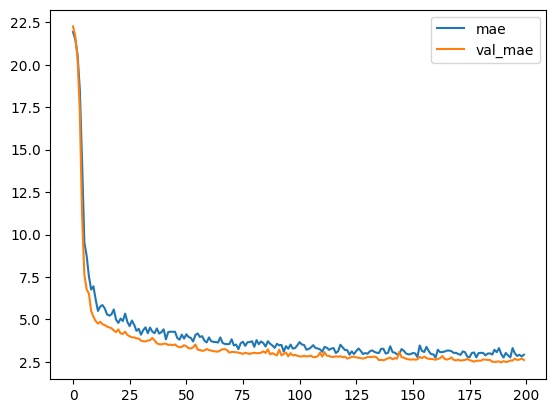

In [ ]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  14.311202049255371
Mean Absolute Error :  2.522596597671509


In [ ]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 2ms/step


array([[14.221551 ],
       [24.493423 ],
       [18.79851  ],
       [17.151466 ],
       [41.693165 ],
       [25.177736 ],
       [32.67546  ],
       [20.808441 ],
       [14.304187 ],
       [19.031553 ],
       [26.01902  ],
       [25.747646 ],
       [17.934994 ],
       [34.651062 ],
       [20.786451 ],
       [12.92255  ],
       [19.207748 ],
       [11.301795 ],
       [10.208465 ],
       [15.001327 ],
       [ 7.4043274],
       [17.343472 ],
       [19.400845 ],
       [20.250742 ],
       [19.195522 ],
       [19.127464 ],
       [17.274399 ],
       [15.695556 ],
       [20.960594 ],
       [17.377874 ],
       [12.074929 ],
       [21.798487 ],
       [33.03684  ],
       [20.950758 ],
       [16.59452  ],
       [16.815756 ],
       [32.700798 ],
       [42.441895 ],
       [22.993122 ],
       [23.48603  ],
       [39.39319  ],
       [31.45874  ],
       [15.707605 ],
       [31.912828 ],
       [30.438526 ],
       [21.340153 ],
       [46.443962 ],
       [18.00

In [ ]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.8629458772487654


5/5 [==============================] - 0s 2ms/step


[]

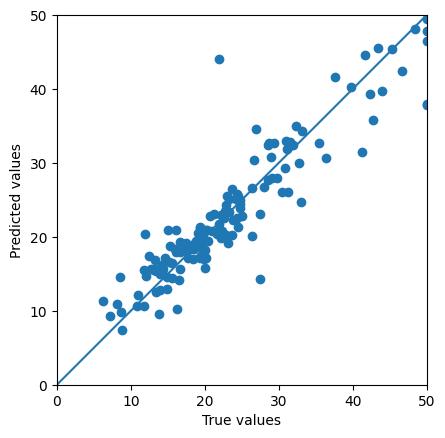

In [ ]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

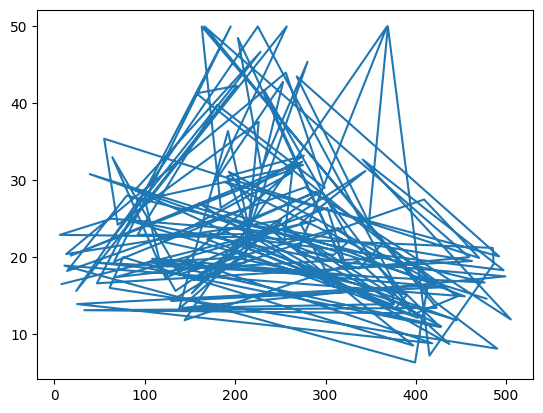

In [ ]:
plt.plot(y_test)


array([[14.221551 ],
       [24.493423 ],
       [18.79851  ],
       [17.151466 ],
       [41.693165 ],
       [25.177736 ],
       [32.67546  ],
       [20.808441 ],
       [14.304187 ],
       [19.031553 ],
       [26.01902  ],
       [25.747646 ],
       [17.934994 ],
       [34.651062 ],
       [20.786451 ],
       [12.92255  ],
       [19.207748 ],
       [11.301795 ],
       [10.208465 ],
       [15.001327 ],
       [ 7.4043274],
       [17.343472 ],
       [19.400845 ],
       [20.250742 ],
       [19.195522 ],
       [19.127464 ],
       [17.274399 ],
       [15.695556 ],
       [20.960594 ],
       [17.377874 ],
       [12.074929 ],
       [21.798487 ],
       [33.03684  ],
       [20.950758 ],
       [16.59452  ],
       [16.815756 ],
       [32.700798 ],
       [42.441895 ],
       [22.993122 ],
       [23.48603  ],
       [39.39319  ],
       [31.45874  ],
       [15.707605 ],
       [31.912828 ],
       [30.438526 ],
       [21.340153 ],
       [46.443962 ],
       [18.00

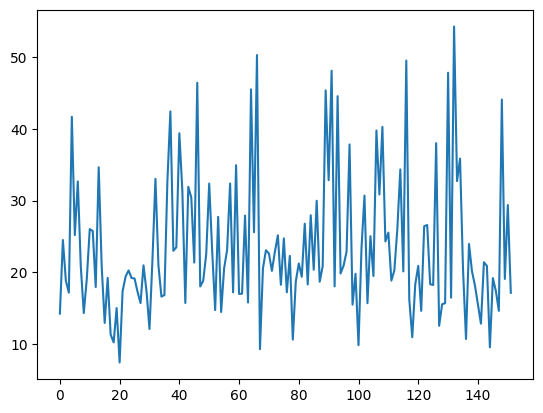

In [ ]:
plt.plot(Y_pred)
Y_pred

In [ ]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[14.221551]
 [24.493423]
 [18.79851 ]
 [17.151466]
 [41.693165]]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64


8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64

Using ML MODEL lm for Linear Regression

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_

27.380936280008477

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-10.90502
1,ZN,5.56777
2,INDUS,-0.238526
3,CHAS,4.693448
4,NOX,-7.01579
5,RM,15.865749
6,AGE,-0.33478
7,DIS,-17.068774
8,RAD,7.503741
9,TAX,-7.370872


In [ ]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


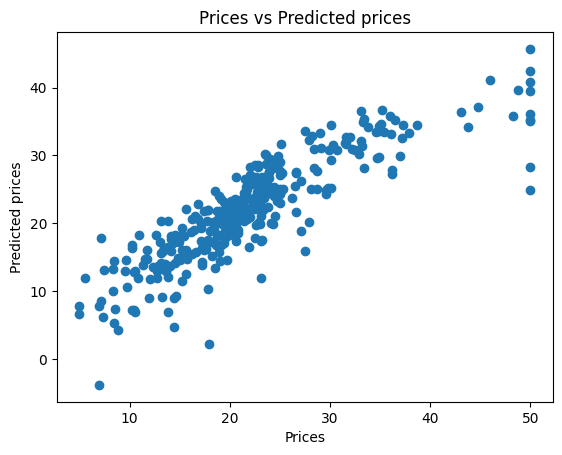

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

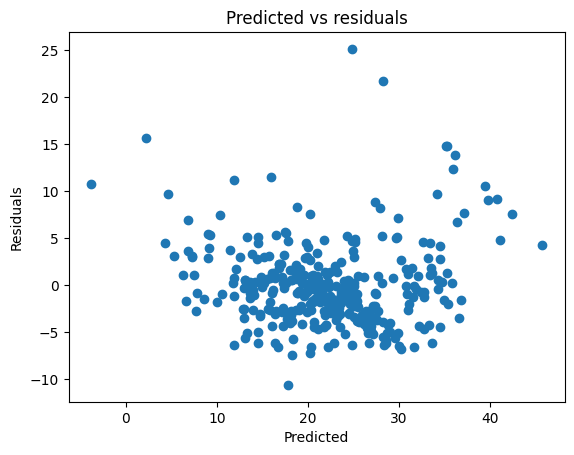

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-34-c62ec83682b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


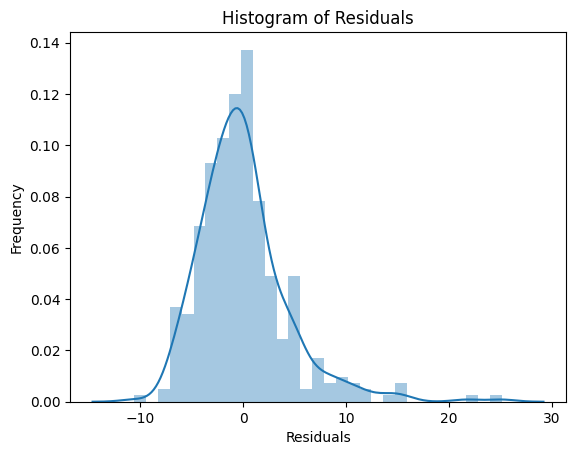

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.859005592370742
MSE: 30.053993307124134
RMSE: 5.482152251362975
